In [1]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [ ]:
# 此函數會幫我們把多張影像畫成一張多宮格圖
def img_combine(img, ncols=8, size=1, path=False):
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len(img)
    nrows = int(ceil(nimg/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip(np.arange(nrows), axes):
            nth=r
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                
            ax.set_axis_off()
    elif nrows == 1:
        for c, ax in zip(np.arange(ncols), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(ncols), row):
                nth=r*ncols+c
                if nth < nimg:
                    ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                ax.set_axis_off()
    plt.show()

In [2]:
# 讀取 Cifar-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


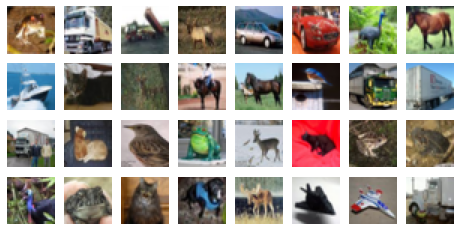

In [ ]:
# 取前 32 張圖片做視覺化
images = x_train[:32]
img_combine(images)

In [ ]:
# 建立 ImageDataGenerator，並指定我們要做資料增強的數值範圍
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

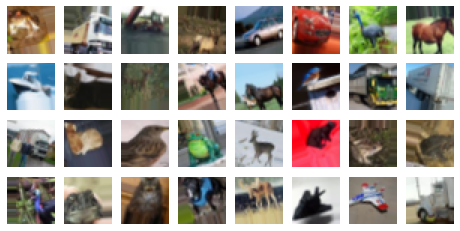

In [ ]:
# 注意！！ ImageDataGenerator 是一個 Generator (生成器)! 對 Generator 不熟悉的同學請回到 Day098 做複習。
# 使用 .flow 後，就會對我們的影像進行增強，再 call next 取出 generator 的圖像。(shuffle=False 因為我們希望圖像的順序不要改變，方便觀察。實際訓練時預設是 shuffle=True) 
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int")) # 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int

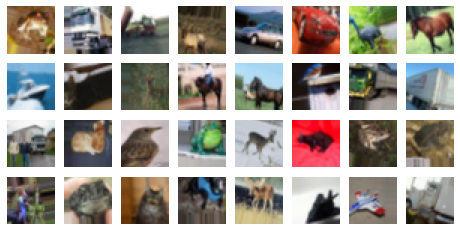

In [ ]:
# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

## 作業

請使用 ImageDataGenerator 來進行 Cifar-10 資料集的訓練，並觀察不同的圖像增強方法是否會顯著影響訓練結果

# 先做未增強前的CNN

In [ ]:
import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
# 讀取 Cifar-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# parameters:
batch_size = 128
epochs = 50
num_classes = 10
# 前處理：
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape = x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

optimizer = Adam()
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)         

In [ ]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=1)
model.evaluate(x_test, y_test)

Epoch 1/50
391/391 [==============================] - 37s 11ms/step - loss: 1.9122 - accuracy: 0.2800 - val_loss: 1.3530 - val_accuracy: 0.5117
Epoch 2/50
391/391 [==============================] - 4s 9ms/step - loss: 1.3897 - accuracy: 0.4986 - val_loss: 1.1749 - val_accuracy: 0.5795
Epoch 3/50
391/391 [==============================] - 4s 10ms/step - loss: 1.2303 - accuracy: 0.5601 - val_loss: 1.0740 - val_accuracy: 0.6163
Epoch 4/50
391/391 [==============================] - 4s 9ms/step - loss: 1.1509 - accuracy: 0.5888 - val_loss: 0.9573 - val_accuracy: 0.6663
Epoch 5/50
391/391 [==============================] - 4s 10ms/step - loss: 1.0820 - accuracy: 0.6172 - val_loss: 0.9292 - val_accuracy: 0.6766
Epoch 6/50
391/391 [==============================] - 4s 10ms/step - loss: 1.0161 - accuracy: 0.6415 - val_loss: 0.8589 - val_accuracy: 0.7008
Epoch 7/50
391/391 [==============================] - 4s 10ms/step - loss: 0.9723 - accuracy: 0.6552 - val_loss: 0.8551 - val_accuracy: 0.7024


[0.5925365686416626, 0.8003000020980835]

# 再做data augment後的CNN

In [ ]:
# 讀取 Cifar-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
aug_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [ ]:
new_img = next(aug_gen.flow(x_train, shuffle=False, batch_size=50000))
print(x_train.shape)
print(new_img.shape)

(50000, 32, 32, 3)
(50000, 32, 32, 3)


In [ ]:
import numpy as np

In [ ]:
x_train = np.vstack((x_train, new_img))
print(x_train.shape)

(100000, 32, 32, 3)


In [ ]:
y_train = np.vstack((y_train, y_train))
print(y_train.shape)

(100000, 1)


In [ ]:
# 前處理：
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape = x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

optimizer = Adam()
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = optimizer)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)         

In [ ]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=1)
model.evaluate(x_test, y_test)

Epoch 1/50
782/782 [==============================] - 8s 10ms/step - loss: 1.9287 - accuracy: 0.2781 - val_loss: 1.2672 - val_accuracy: 0.5413
Epoch 2/50
782/782 [==============================] - 7s 9ms/step - loss: 1.4173 - accuracy: 0.4857 - val_loss: 1.1188 - val_accuracy: 0.6027
Epoch 3/50
782/782 [==============================] - 7s 9ms/step - loss: 1.2733 - accuracy: 0.5412 - val_loss: 1.0225 - val_accuracy: 0.6309
Epoch 4/50
782/782 [==============================] - 7s 9ms/step - loss: 1.1817 - accuracy: 0.5765 - val_loss: 0.9435 - val_accuracy: 0.6623
Epoch 5/50
782/782 [==============================] - 7s 9ms/step - loss: 1.1335 - accuracy: 0.5956 - val_loss: 0.8874 - val_accuracy: 0.6863
Epoch 6/50
782/782 [==============================] - 7s 9ms/step - loss: 1.0749 - accuracy: 0.6164 - val_loss: 0.8763 - val_accuracy: 0.6898
Epoch 7/50
782/782 [==============================] - 7s 9ms/step - loss: 1.0532 - accuracy: 0.6283 - val_loss: 0.8342 - val_accuracy: 0.7041
Epoch

[0.6054254770278931, 0.7908999919891357]